In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
parking = pd.read_excel('parking.xls')

In [4]:
parking.head()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [5]:
parking.tail()

,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
9055,FALLON,NV,ACTIVE,BUILDING,12,LEASED
9056,ELKO,NV,ACTIVE,BUILDING,2,LEASED
9057,LAS VEGAS,NV,ACTIVE,BUILDING,3,LEASED
9058,LAS VEGAS,NV,ACTIVE,BUILDING,24,LEASED
9059,LAS VEGAS,NV,ACTIVE,BUILDING,7,LEASED


# Number of various Building Status

In [6]:
parking['Bldg Status'].value_counts()

ACTIVE            8981
EXCESS              70
DECOMMISSIONED       9
Name: Bldg Status, dtype: int64

# Number of various Property Types

In [7]:
parking['Property Type'].value_counts()

BUILDING     8602
STRUCTURE     339
LAND          119
Name: Property Type, dtype: int64

In [8]:
parking.columns

Index(['Bldg City', 'Bldg State', 'Bldg Status', 'Property Type',
       'Total Parking Spaces', 'Owned/Leased'],
      dtype='object')

# Distribution or values for owned/leased

<BarContainer object of 9060 artists>

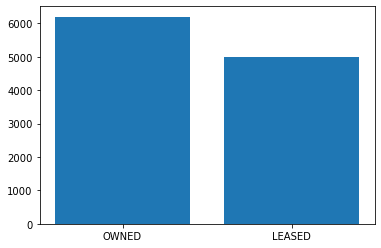

In [10]:
plt.bar(parking['Owned/Leased'],parking['Total Parking Spaces'])

In [17]:
owned_leased = pd.pivot_table(parking, index = 'Owned/Leased', values = 'Total Parking Spaces', aggfunc = 'count' )

In [18]:
owned_leased

,Total Parking Spaces
Owned/Leased,
LEASED,6940
OWNED,2120


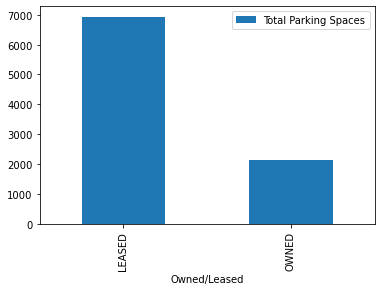

In [19]:
owned_leased.plot(kind='bar')

<BarContainer object of 2 artists>

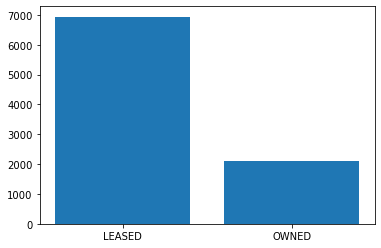

In [20]:
plt.bar(owned_leased.index,owned_leased['Total Parking Spaces'])

# In which bldg state parking situation is in excess - Put it in a order

In [21]:
parking.head()


,Bldg City,Bldg State,Bldg Status,Property Type,Total Parking Spaces,Owned/Leased
0,HARTFORD,CT,ACTIVE,BUILDING,29,OWNED
1,NEW HAVEN,CT,ACTIVE,BUILDING,0,OWNED
2,WATERBURY,CT,ACTIVE,BUILDING,2,LEASED
3,WILLIMANTIC,CT,ACTIVE,BUILDING,0,LEASED
4,HARTFORD,CT,ACTIVE,BUILDING,103,OWNED


In [22]:
excess_parking = pd.pivot_table(parking, index = "Bldg State", columns = 'Bldg Status', values = 'Total Parking Spaces')

In [23]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
AR,37.000000,NaN,NaN
AZ,32.256757,NaN,NaN
CA,60.493298,NaN,NaN
CO,78.936709,NaN,22.200000
CT,29.327586,NaN,NaN
DC,41.255144,NaN,NaN
DE,15.750000,NaN,NaN
FL,51.905569,NaN,NaN


In [24]:
excess_parking = excess_parking[excess_parking.EXCESS > 0]

In [25]:
excess_parking

Bldg Status,ACTIVE,DECOMMISSIONED,EXCESS
Bldg State,,,
AL,62.357724,NaN,59.000000
CO,78.936709,NaN,22.200000
IL,45.000000,NaN,21.000000
LA,43.684932,NaN,68.666667
MD,104.185090,0.000000,43.166667
MO,121.200000,815.333333,254.272727
NE,54.060000,NaN,19.000000
NJ,32.169118,NaN,4.300000
NV,48.648649,NaN,173.000000


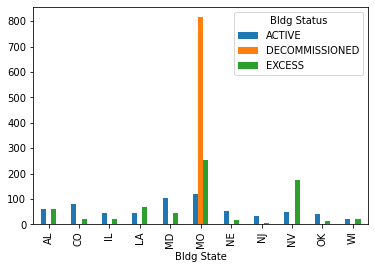

In [26]:
excess_parking.plot(kind = 'bar')

<BarContainer object of 11 artists>

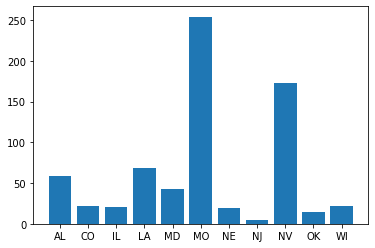

In [27]:
plt.bar(excess_parking.index,excess_parking.EXCESS)

In [32]:
excess_parking_sorted = excess_parking.EXCESS.sort_values(ascending=False)
excess_parking_sorted

Bldg State
MO    254.272727
NV    173.000000
LA     68.666667
AL     59.000000
MD     43.166667
CO     22.200000
WI     22.000000
IL     21.000000
NE     19.000000
OK     14.000000
NJ      4.300000
Name: EXCESS, dtype: float64

<BarContainer object of 11 artists>

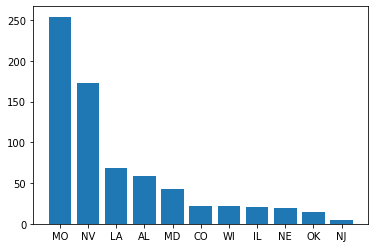

In [33]:
plt.bar(excess_parking_sorted.index, excess_parking_sorted.values)